# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad  Arief Rachman
- **Email:** ariefrachh25@gmail.com
- **ID Dicoding:** ariefrachh25

## Menentukan Pertanyaan Bisnis

- Pada jam dan hari apa saja terdapat 'rush hour' pada system Bike Sharing tersebut?
- Bagaimana trend Bike Sharing di Washington DC pada Januari 2011 hingga Desember 2012?
- Bagaimana pengaruh suhu terhadap pengguna Bike Sharing pada musim spring di Washington DC tahun 2011?

## Import Semua Packages/Library yang Digunakan

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [245]:
data1 = pd.read_csv('hour.csv')
data1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [246]:
data2 = pd.read_csv('day.csv')
data2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Jumlah peminjaman sepeda pada saat working day relatif lebih tinggi dibandingkan pada saat weekend
- Jumlah peminjaman sepeda pada saat cuaca cerah atau weathersit : 1 dan 2 relatif lebih tinggi dibandingkan pada saat weathersit : 3 dan 4

### Assessing Data

In [247]:
data1.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [248]:
data2.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [249]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [250]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [251]:
data1.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [252]:
data2.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [253]:
data1.duplicated().sum()

0

In [254]:
data2.duplicated().sum()

0

**Insight:**
- Terdapat ketidaksesuaian data type pada 'dteday' yang seharusnya memiliki data type : date time
- Pada kedua dataset tersebut tidak terdapat missing values maupun duplicated data
- Sejauh ini tidak tedapat nilai ekstrem dari kedua dataset tersebut yang mengindikasi adanya outliers atau semacamnya

### Cleaning Data

In [255]:
data1['dteday'] = pd.to_datetime(data1['dteday'], format='%Y-%m-%d')
data2['dteday'] = pd.to_datetime(data1['dteday'], format='%Y-%m-%d')

In [256]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    data1[column] =  data1[column].astype("category")
    data2[column] =  data2[column].astype("category")

In [257]:
data1_cleaned = data1.drop(columns=['workingday'])
data2_cleaned = data2.drop(columns=['workingday'])

**Insight:**
- Tipe data 'dteday' sudah diubah ke dalam date time yang nantinya akan berguna dalam perihal visualiasi dan explanatory data
- Untuk data 1 dan 2 sudah dilakukan drop column untuk column yang sekiranya tidak relevan untuk menjawab pertanyaan

## Exploratory Data Analysis (EDA)

### Explore Dataset

In [258]:
total_count = data2_cleaned['cnt'].sum()
print("Total jumlah pengguna bike-sharing:", total_count)

Total jumlah pengguna bike-sharing: 3292679


In [259]:
data2_cleaned.groupby(by="yr").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
yr,,
0,995851,247252
1,1676811,372765


In [260]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
data2_cleaned['season'] = data2_cleaned['season'].map(season_map)

total_users_by_season = data2_cleaned.groupby('season')['cnt'].sum()

print("Jumlah total pengguna bike sharing per musim:")
print(total_users_by_season)

Jumlah total pengguna bike sharing per musim:
season
Spring     471348
Summer     918589
Fall      1061129
Winter     841613
Name: cnt, dtype: int64


<ipython-input-260-c01d0c12907e>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_users_by_season = data2_cleaned.groupby('season')['cnt'].sum()


In [261]:
season_min_max = data2_cleaned.groupby('season')['cnt'].agg(['min', 'max'])

print("Jumlah Minimum dan Maksimum Pengguna Bike Sharing per Musim:")
print(season_min_max)

Jumlah Minimum dan Maksimum Pengguna Bike Sharing per Musim:
         min   max
season            
Spring   431  7836
Summer   795  8362
Fall    1115  8714
Winter    22  8555


<ipython-input-261-bda992f084e2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_min_max = data2_cleaned.groupby('season')['cnt'].agg(['min', 'max'])


In [262]:
average_users_per_season = data2_cleaned.groupby('season')['cnt'].mean()

print("Rata-rata pengguna per musim:")
print(average_users_per_season)

Rata-rata pengguna per musim:
season
Spring    2604.132597
Summer    4992.331522
Fall      5644.303191
Winter    4728.162921
Name: cnt, dtype: float64


<ipython-input-262-0930051553ab>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_users_per_season = data2_cleaned.groupby('season')['cnt'].mean()


In [263]:
weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
data2_cleaned['weathersit'] = data2_cleaned['weathersit'].map(weather_map)

total_users_by_weather = data2_cleaned.groupby('weathersit')['cnt'].sum()

print(total_users_by_weather)

weathersit
Clear              2257952
Mist                996858
Light Rain/Snow      37869
Name: cnt, dtype: int64


<ipython-input-263-eb9b5f906acd>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_users_by_weather = data2_cleaned.groupby('weathersit')['cnt'].sum()


In [264]:
weather_stats = data2_cleaned.groupby('weathersit')['cnt'].agg(['min', 'max'])
print(weather_stats)

                 min   max
weathersit                
Clear            431  8714
Mist             605  8362
Light Rain/Snow   22  4639


<ipython-input-264-fb76ffbbe37e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_stats = data2_cleaned.groupby('weathersit')['cnt'].agg(['min', 'max'])


In [265]:
average_users_by_weather = data2_cleaned.groupby('weathersit')['cnt'].mean()

print("Rata-rata jumlah pengguna bike-sharing per kondisi cuaca:")
print(average_users_by_weather)

Rata-rata jumlah pengguna bike-sharing per kondisi cuaca:
weathersit
Clear              4876.786177
Mist               4035.862348
Light Rain/Snow    1803.285714
Name: cnt, dtype: float64


<ipython-input-265-6a936a331a3e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_users_by_weather = data2_cleaned.groupby('weathersit')['cnt'].mean()


In [266]:
weekly_totals = data1_cleaned.groupby('weekday')['cnt'].sum()

weekday_map = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

for day, total in weekly_totals.items():
    print(f"{weekday_map[day]}: {total}")

Sunday: 444027
Monday: 455503
Tuesday: 469109
Wednesday: 473048
Thursday: 485395
Friday: 487790
Saturday: 477807


<ipython-input-266-539b7ff86871>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_totals = data1_cleaned.groupby('weekday')['cnt'].sum()


In [267]:
min_total = weekly_totals.min()
max_total = weekly_totals.max()

print(f"\nTotal pengguna minimum pada hari tertentu: {min_total}")
print(f"Total pengguna maksimum pada hari tertentu: {max_total}")


Total pengguna minimum pada hari tertentu: 444027
Total pengguna maksimum pada hari tertentu: 487790


In [268]:
hourly_users = data1_cleaned.groupby('hr')['cnt'].sum().reset_index()

for index, row in hourly_users.iterrows():
    print(f"Hour {row['hr']}: {row['cnt']}")

Hour 0: 39130
Hour 1: 24164
Hour 2: 16352
Hour 3: 8174
Hour 4: 4428
Hour 5: 14261
Hour 6: 55132
Hour 7: 154171
Hour 8: 261001
Hour 9: 159438
Hour 10: 126257
Hour 11: 151320
Hour 12: 184414
Hour 13: 184919
Hour 14: 175652
Hour 15: 183149
Hour 16: 227748
Hour 17: 336860
Hour 18: 309772
Hour 19: 226789
Hour 20: 164550
Hour 21: 125445
Hour 22: 95612
Hour 23: 63941


In [269]:
min_users = hourly_users['cnt'].min()
max_users = hourly_users['cnt'].max()

print(f"\nTotal pengguna minimum pada jam tertentu: {min_users}")
print(f"Total pengguna maksimum pada jam tertentu: {max_users}")


Total pengguna minimum pada jam tertentu: 4428
Total pengguna maksimum pada jam tertentu: 336860


**Insight:**
- Jumlah total pengguna Bike Sharing terdapat pada musim spring jauh lebih sedikit dibandingkan musim lainnya, bisa saja karena suhu yang cenderung tinggi, cuaca lembap, atau sering terjadi hujan rintik
- Jumlah total pengguna Bike Sharing cenderung terbagi rata pada setiap harinya dan biasanya terjadi lompatan jumlah pengguna yang tinggi pada pagi hari dan sore hari, hal tersebut bisa dikarenakan jam berangkat dan pulang kerja

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

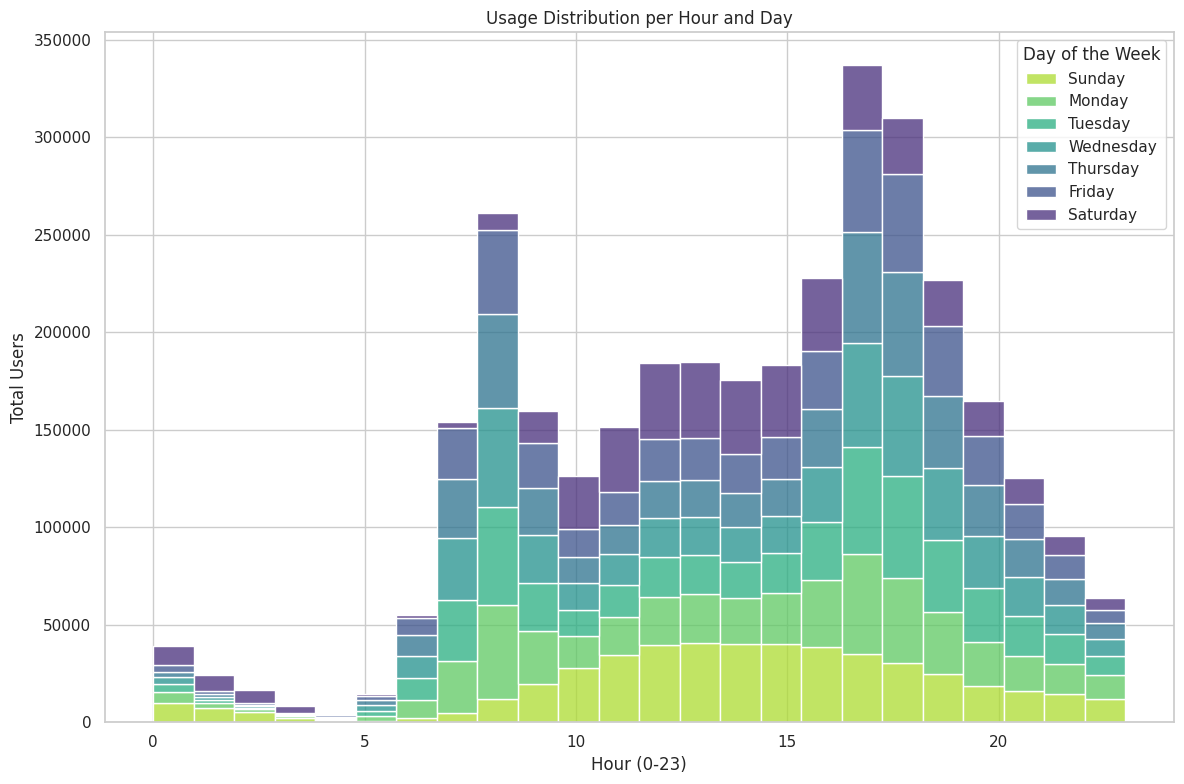

In [270]:
plt.figure(figsize=(12, 8))

sns.histplot(data=data1_cleaned, x='hr', weights='cnt', hue='weekday', multiple='stack', palette='viridis', bins=24)

plt.title('Usage Distribution per Hour and Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Total Users')
plt.legend(title='Day of the Week', labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.tight_layout()
plt.show()

### Pertanyaan 2:

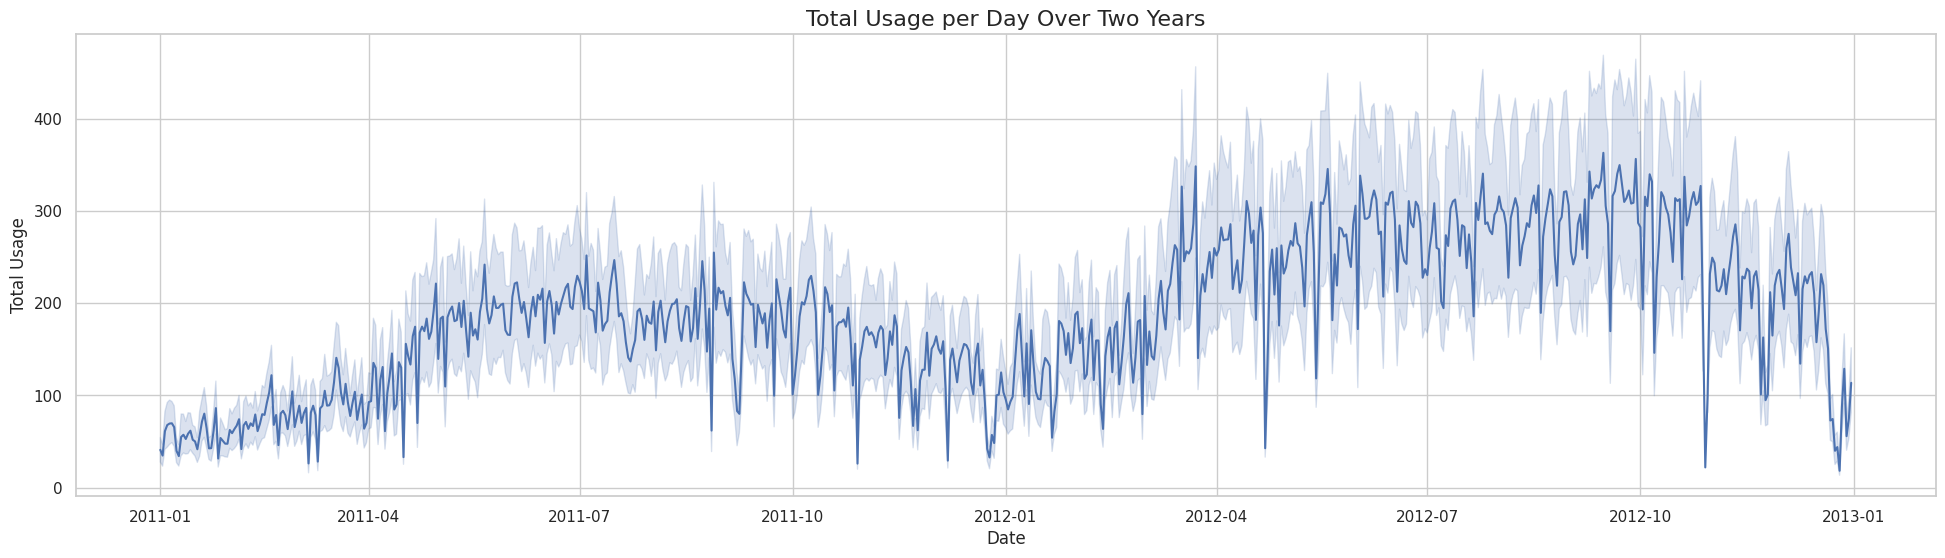

In [273]:
data1_cleaned['dteday'] = pd.to_datetime(data1_cleaned['dteday'])

plt.figure(figsize=(24, 6))
sns.lineplot(x='dteday', y='cnt', data=data1_cleaned)

plt.title('Total Usage per Day Over Two Years', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Usage')

# Show the plot
plt.show()

### Pertanyaan 3:

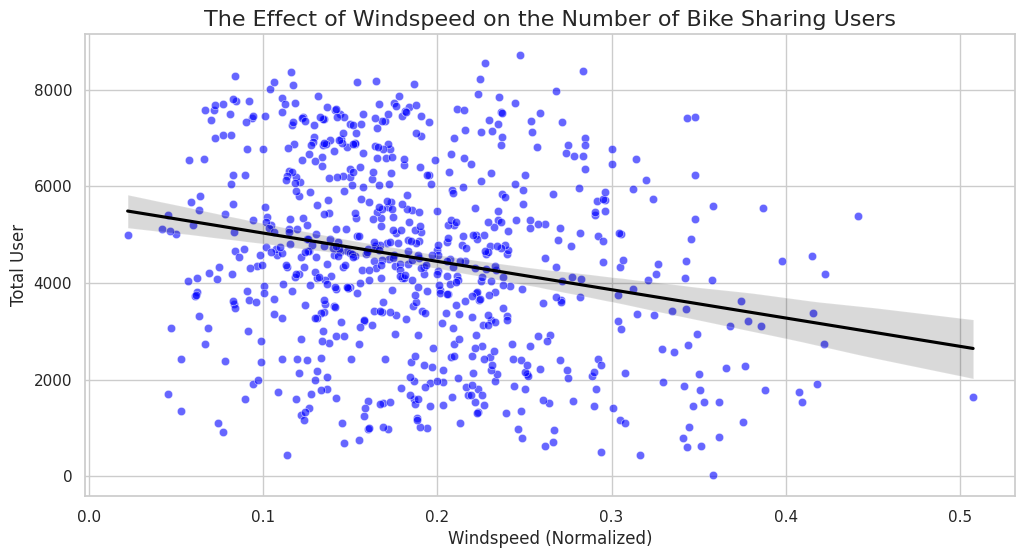

In [272]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data2_cleaned, x='windspeed', y='cnt', color='blue', alpha=0.6)
sns.regplot(x='windspeed', y='cnt', data=data2_cleaned, scatter=False, color='black')

plt.title('The Effect of Windspeed on the Number of Bike Sharing Users', fontsize=16)
plt.xlabel('Windspeed (Normalized)', fontsize=12)
plt.ylabel('Total User', fontsize=12)
plt.show()

**Insight:**
- Jumlah pengguna paling tinggi terdapat pada sekitar jam 8 pagi dan 5 sore
- Terdapat pola kenaikan jumlah total pengguna bike sharing setelah bulan ke 3 dan pola penurunan setelah bulan ke 9
- Semakin tinggi windspeed pada musim spring di tahun 2011 maka semakin rendah jumlah pengguna bike sharing tersebut

## Conclusion

- Jika melihat hanya dari jumlah pengguna bike sharing berdasarkan per hari dan per jam maka rush hour dapat kita temukan umumnya pada hari kamis dan jumat disekitar jam 8 AM dan 5 PM
- Trend bike sharing menunjukkan pola tertentu seperti ada pola kenaikan dan penurunan pada setiap tahunnya, hal tersebut bisa saja dikarenakan pengaruh musim, suhu, dan cuaca. Jadi ketika di musim yang mempunyai karakteristik cuaca hujan deras atau angin yang terlalu kencang biasanya jumlah pengguna akan menurun dan sebaliknya jika pada musim yang mempunyai karakteristik cuaca cenderung clear/cloudy atau angin tidak terlalu kencang serta suhu yang normal maka jumlah pengguna akan meningkat
- Windspeed jelas mempengaruhi jumlah total pengguna bike sharing, seperti yang dapat dilihat dari visualiasinya menunjukkan grafik menurun membuktikan bahwa semakin tinggi windspeednya makan semakin rendah jumlah penggunanya